# QUESTION: Video Games Sales

Input: \
Critic score - bad, regular, good \
User score - bad, regular, good \
Year - old, modern

Output: \
Sales - low, medium, high 

Rules:

IF (critic score is bad) AND (user score is bad) AND (year is old), THEN sales is low. \
IF (critic score is bad) AND (user score is bad) AND (year is modern), THEN sales is low. \
IF (critic score is bad) AND (user score is regular) AND (year is old), THEN sales is low. \
IF (critic score is bad) AND (user score is regular) AND (year is modern), THEN sales is low. \
IF (critic score is bad) AND (user score is good) AND (year is old), THEN sales is low. \
IF (critic score is bad) AND (user score is good) AND (year is modern), THEN sales is low.

IF (critic score is regular) AND (user score is bad) AND (year is old), THEN sales is low. \
IF (critic score is regular) AND (user score is bad) AND (year is modern), THEN sales is low. \
IF (critic score is regular) AND (user score is regular) AND (year is old), THEN sales is low. \
IF (critic score is regular) AND (user score is regular) AND (year is modern), THEN sales is medium. \
IF (critic score is regular) AND (user score is good) AND (year is old), THEN sales is medium. \
IF (critic score is regular) AND (user score is good) AND (year is modern), THEN sales is high.

IF (critic score is good) AND (user score is bad) AND (year is old), THEN sales is low. \
IF (critic score is good) AND (user score is bad) AND (year is modern), THEN sales is low. \
IF (critic score is good) AND (user score is regular) AND (year is old), THEN sales is medium. \
IF (critic score is good) AND (user score is regular) AND (year is modern), THEN sales is high. \
IF (critic score is good) AND (user score is good) AND (year is old), THEN sales is high. \
IF (critic score is good) AND (user score is good) AND (year is modern), THEN sales is high.

Q: How high is the global sales if the critic score is rated 39 out of 100, the user score is rated 7 out of 10, and the year published is 2000?

## 1. Install scikit-fuzzy package & libraries

In [1]:
# install fuzzy package
!pip install -U scikit-fuzzy

In [2]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

## 2. Declare fuzzy variable and membership function

In [3]:
# new Antecedent/Consequent objects hold universe variables and membership functions

critic_score = ctrl.Antecedent(np.arange(0, 101, 1), 'critic score')
user_score = ctrl.Antecedent(np.arange(0, 11, 1), 'user score')
year = ctrl.Antecedent(np.arange(1990, 2020, 1), 'year')

sales = ctrl.Consequent(np.arange(0, 91, 1), 'sales')

## 3. Create fuzzy membership function for Critic Score

D:\Installation\anaconda3\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


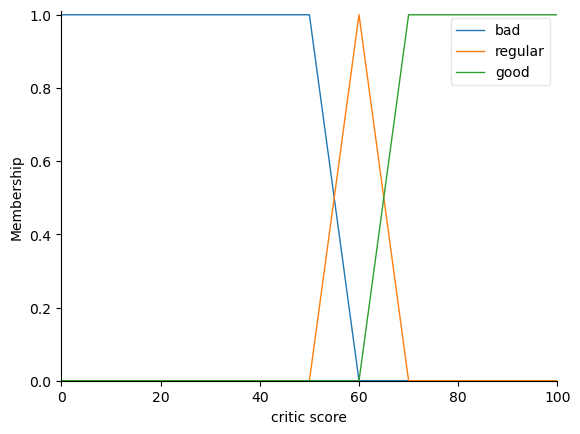

In [4]:
# create membership function for Critic Score
critic_score['bad'] = fuzz.trapmf(critic_score.universe, [0, 0, 50, 60])
critic_score['regular'] = fuzz.trimf(critic_score.universe, [50, 60, 70])
critic_score['good'] = fuzz.trapmf(critic_score.universe, [60, 70, 100, 101])

# visualize plot generated 
critic_score.view()

## 4. Create fuzzy membership function for User Score

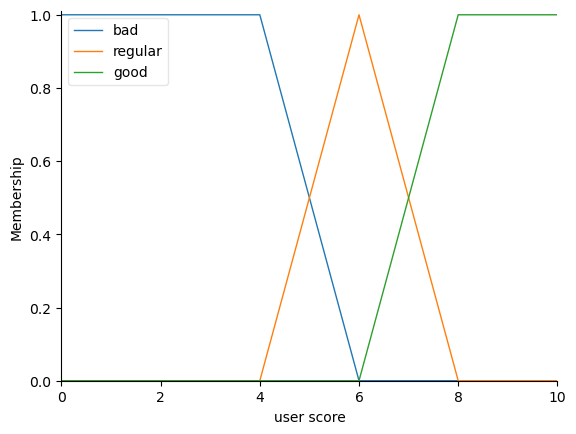

In [5]:
# create membership function for User Score
user_score['bad'] = fuzz.trapmf(user_score.universe, [0, 0, 4, 6])
user_score['regular'] = fuzz.trimf(user_score.universe, [4, 6, 8])
user_score['good'] = fuzz.trapmf(user_score.universe, [6, 8, 10, 11])

# visualize plot generated 
user_score.view()

## 5. Create fuzzy membership function for Year

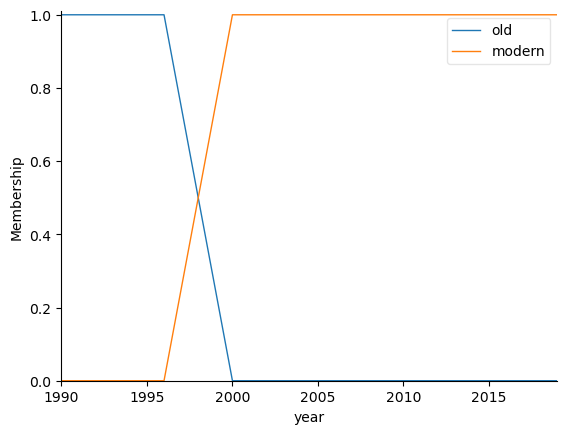

In [6]:
# custom membership function for Year
year['old'] = fuzz.trapmf(year.universe, [0, 0, 1996, 2000])
year['modern'] = fuzz.trapmf(year.universe, [1996, 2000, 2019, 2020])

# visualize plot generated 
year.view()

## 6. Create fuzzy membership function for Sales

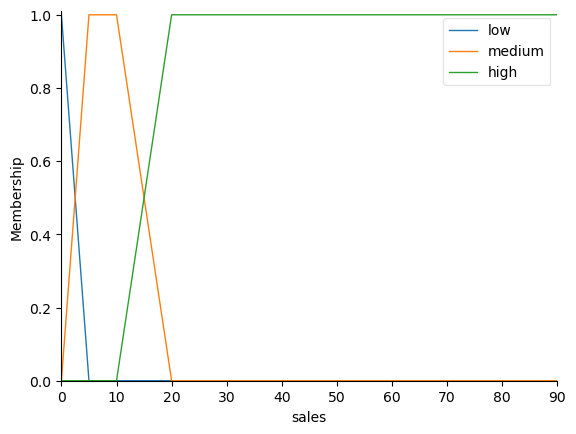

In [7]:
# custom membership function for Sales
sales['low'] = fuzz.trimf(sales.universe, [0, 0, 5])
sales['medium'] = fuzz.trapmf(sales.universe, [0, 5, 10, 20])
sales['high'] = fuzz.trapmf(sales.universe, [10, 20, 90, 91])

# visualize plot generated 
sales.view()

## 7. Construct fuzzy rules

In [13]:
# create rules
rule1 = ctrl.Rule(critic_score['bad'] & (user_score['bad'] & year['old']), sales['low'])
rule2 = ctrl.Rule(critic_score['bad'] & (user_score['bad'] & year['modern']), sales['low'])
rule3 = ctrl.Rule(critic_score['bad'] & (user_score['regular'] & year['old']), sales['low'])
rule4 = ctrl.Rule(critic_score['bad'] & (user_score['regular'] & year['modern']), sales['low'])
rule5 = ctrl.Rule(critic_score['bad'] & (user_score['good'] & year['old']), sales['low'])
rule6 = ctrl.Rule(critic_score['bad'] & (user_score['good'] & year['modern']), sales['low'])

rule7 = ctrl.Rule(critic_score['regular'] & (user_score['bad'] & year['old']), sales['low'])
rule8 = ctrl.Rule(critic_score['regular'] & (user_score['bad'] & year['modern']), sales['low'])
rule9 = ctrl.Rule(critic_score['regular'] & (user_score['regular'] & year['old']), sales['low'])
rule10 = ctrl.Rule(critic_score['regular'] & (user_score['regular'] & year['modern']), sales['medium'])
rule11 = ctrl.Rule(critic_score['regular'] & (user_score['good'] & year['old']), sales['medium'])
rule12 = ctrl.Rule(critic_score['regular'] & (user_score['good'] & year['modern']), sales['high'])

rule13 = ctrl.Rule(critic_score['good'] & (user_score['bad'] & year['old']), sales['low'])
rule14 = ctrl.Rule(critic_score['good'] & (user_score['bad'] & year['modern']), sales['low'])
rule15 = ctrl.Rule(critic_score['good'] & (user_score['regular'] & year['old']), sales['medium'])
rule16 = ctrl.Rule(critic_score['good'] & (user_score['regular'] & year['modern']), sales['high'])
rule17 = ctrl.Rule(critic_score['good'] & (user_score['good'] & year['old']), sales['high'])
rule18 = ctrl.Rule(critic_score['good'] & (user_score['good'] & year['modern']), sales['high'])

game_sales_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8, rule9, rule10, rule11, rule12, rule13, rule14, rule15, rule16, rule17, rule18])
game_sales = ctrl.ControlSystemSimulation(game_sales_ctrl)

## 8. Defuzzification

Game sales: 1.94


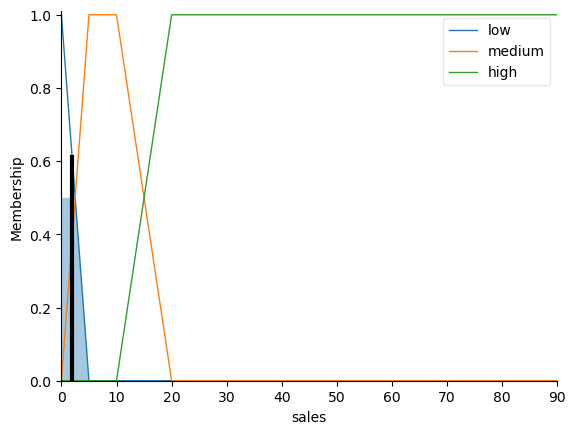

In [19]:
game_sales.input['critic score'] = 39
game_sales.input['user score'] = 7
game_sales.input['year'] = 2000
game_sales.compute()

print("Game sales:", round(game_sales.output['sales'], 2)) 
sales.view(sim=game_sales)